# Test SNR improvement from combining observations
This is a long overdue test to show that combine the nod spectra togeter improves the singal to noise by a factor of ~sqrt(8)

I will load some observations and the combined observation and compare the snr from my calculator.

In [54]:
from astropy.io import fits
import numpy as np
# from snr_calculations import strided_snr
from snr_calculations import snrscan

import matplotlib.pyplot as plt

In [55]:
# Load in some data
Apos_1 = fits.getdata("../../../data/Crires/BDs-DRACS/HD30501-1/Combined_Nods/CRIRE.2012-04-07T00-08-29.976_2.nod.ms.norm.Apos.fits")
Bpos_1 = fits.getdata("../../../data/Crires/BDs-DRACS/HD30501-1/Combined_Nods/CRIRE.2012-04-07T00-08-29.976_2.nod.ms.norm.Bpos.fits")
Sum_1 =  fits.getdata("../../../data/Crires/BDs-DRACS/HD30501-1/Combined_Nods/CRIRE.2012-04-07T00-08-29.976_2.nod.ms.norm.sum.fits")


# Check norm is same as unnormed
#norm = fits.getdata("../../../data/Crires/BDs-DRACS/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:08:29.976_1.nod.ms.norm.fits")
#unnorm =  fits.getdata("../../../data/Crires/BDs-DRACS/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:08:29.976_1.nod.ms.fits")
# norm and unnormed are similar but will be different as norm has a large slope not taken out.


# Individual nod positions
nod1 = fits.getdata("../../../data/Crires/BDs-DRACS/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:08:29.976_2.nod.ms.norm.fits")
nod2 = fits.getdata("../../../data/Crires/BDs-DRACS/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:12:08.127_2.nod.ms.norm.fits")
nod3 = fits.getdata("../../../data/Crires/BDs-DRACS/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:15:38.035_2.nod.ms.norm.fits")
nod4 = fits.getdata("../../../data/Crires/BDs-DRACS/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:19:19.884_2.nod.ms.norm.fits")
nod5 = fits.getdata("../../../data/Crires/BDs-DRACS/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:22:48.876_2.nod.ms.norm.fits")
nod6 = fits.getdata("../../../data/Crires/BDs-DRACS/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:26:28.142_2.nod.ms.norm.fits")
nod7 = fits.getdata("../../../data/Crires/BDs-DRACS/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:29:57.131_2.nod.ms.norm.fits")
nod8 = fits.getdata("../../../data/Crires/BDs-DRACS/HD30501-1/Intermediate_steps/CRIRE.2012-04-07T00:33:37.047_2.nod.ms.norm.fits")

nods = [nod1, nod2, nod3, nod4, nod5, nod6, nod7, nod8]

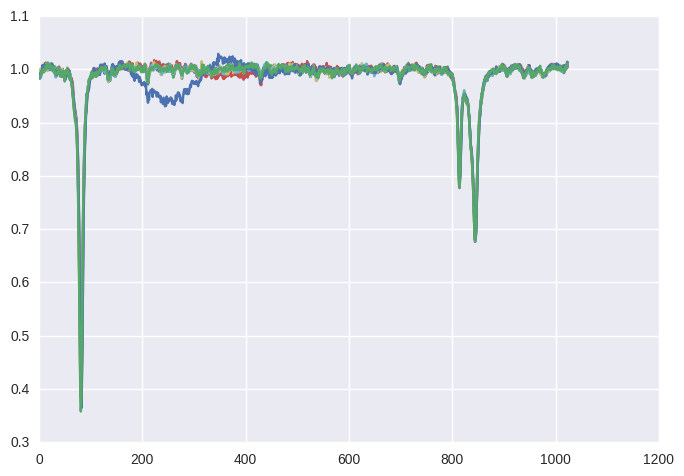

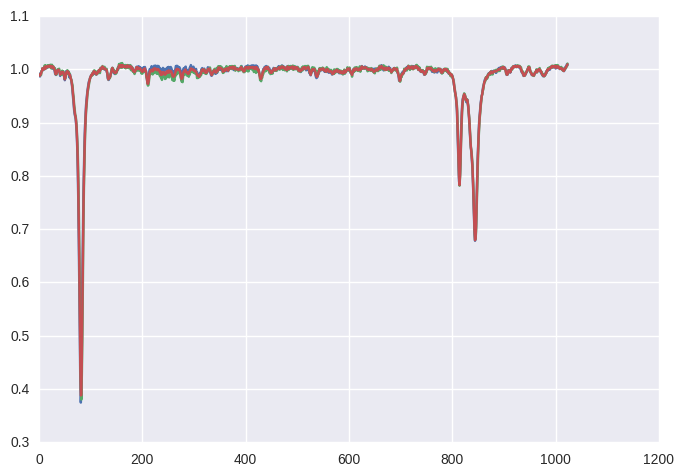

In [56]:
# Print the spectra

for nod in nods:
    plt.plot(nod)
plt.show()



plt.figure()
plt.plot(Apos_1)
plt.plot(Bpos_1)
plt.plot(Sum_1)
plt.show()


slice [160:190]

In [65]:
frame = 100 # frame length 

ii = 0
snr_nods = []*8
for nod in nods:
    print(ii)
    snr = snrscan(nod, frame)
    snr_nods.append(np.asarray(snr))
    ii += 1
    
AB_snr = []
for nod in [Apos_1, Bpos_1]:
    snr = snrscan(nod, frame)
    AB_snr.append(np.asarray(snr))
    
snr_sum1 = np.asarray(snrscan(Sum_1, frame))


0
1
2
3
4
5
6
7


In [66]:

#print(snr_nods)



0
1
2
3
4
5
6
7


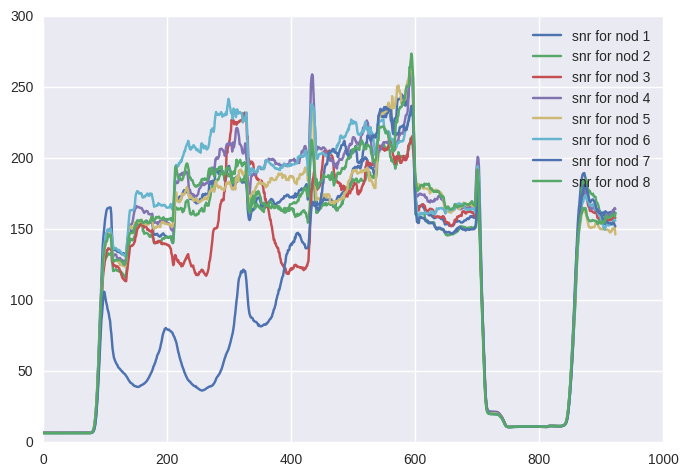

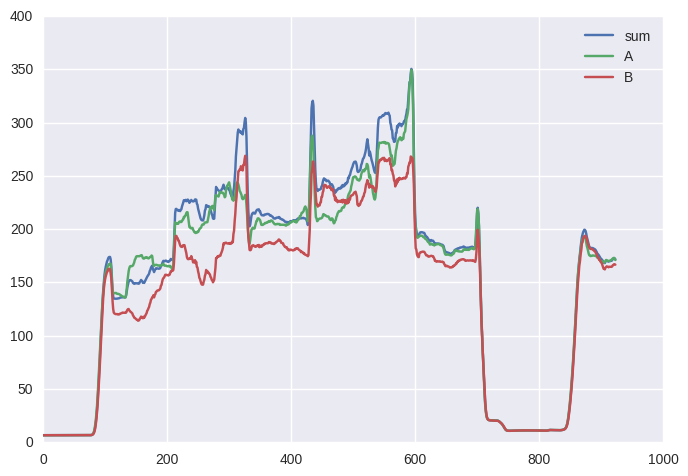

In [67]:
# Plot results

plt.figure()
for i, nod in enumerate(snr_nods):
    print(i)
    plt.plot(nod, label="snr for nod {}".format(i + 1))

    
plt.legend()    
plt.show()


plt.plot(snr_sum1, label="sum")
plt.plot(AB_snr[0], label="A")
plt.plot(AB_snr[1], label="B")
plt.legend()
plt.show()


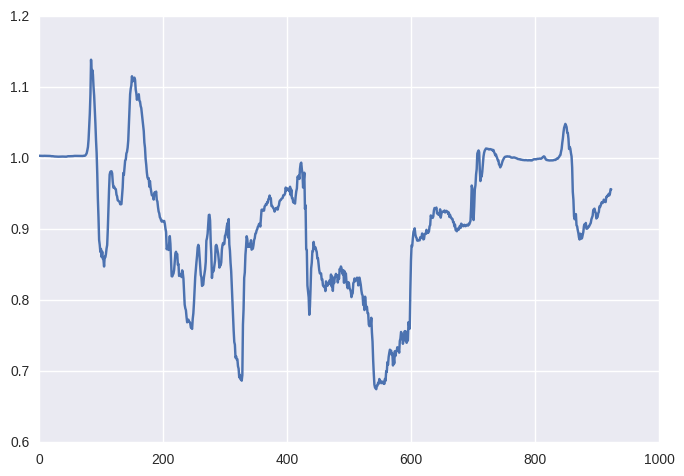

2.82842712475
0.353553390593


In [70]:
# Difference between summed and individual

snr_diff = snr_nods[3] / snr_sum1

plt.plot(snr_diff)
plt.show()

print(np.sqrt(8))

print(1/(np.sqrt(8)))

In [69]:
#Not conclusive. yet

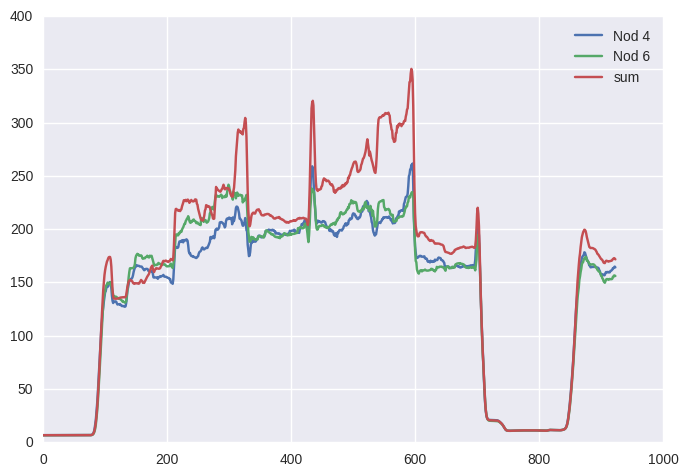

In [72]:
plt.plot(snr_nods[3], label="Nod 4")
plt.plot(snr_nods[5], label="Nod 6")
plt.plot(snr_sum1, label="sum")
plt.legend()
plt.show()